## Desafio Final - Módulo 5 - Machine Learning
##### **Com respotas do questionário**

## Objetivo:
Exercitar os seguintes conceitos trabalhados no Módulo:
- Pré-processamento dos dados.
- Detecção de anomalias.
- Processamento dos dados.
- Correlações.
- Redução da dimensionalidade.
- Algoritmos supervisionados e não supervisionados

**Cars Data Set**<br>
Enunciado

Para todo engenheiro de Machine Learning é fundamental que todos os sete passos para construção de uma solução sejam seguidos. Nesse sentido, saber percorrer todas essas etapas e, ao final, identificar a melhor estratégia, é papel primordial para esse profissional.
Neste desafio final vamos empregar boa parte dos conceitos mostrados no decorrer de todos os módulos do bootcamp para a análise e classificação de veículos, do conhecido dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e cilindradas cúbicas.
Para essa análise vamos empregar os conceitos de redução da dimensionalidade com o PCA, clusterização com o K-Means e classificações com algoritmos supervisionados.

Attribute Information:

Dataset has 8 parameters, check description of each parameter below:

1. mpg - Miles Per Gallon in common words it represents the fuel per mile or we say mileage. usually lesser power vechicle have more mileage compare to higher ones.

2. cylinders - Cylinders is internal part of engine which give the accelaration power , more the number of cylinders, more capacity to go faster.

3. cubicinches - Displacement is the size of the engine internally, measured in cubic inches (on American engines anwyay), and in CC's (cubic centemeters) on small import engines, or in liters on larger import engines. A 350 engine means it "displaces" 350 cubic inches of "area" internally that can be filled with fuel and air.

4. hp - horsepower commonly used term it specify the engine capacity. it is also called torque which means power needed to move your vechicle from 1 place to other.

5. weightlbs - It represents weight of a car.

6. time-to-60 - This parameter tells that how much second a car take to reach 60 miles or 100 km/hr speed.

7. year - Which year car has been launched.

8. brand - Barnd represent the owner country, which has designed this car in ours (US, Europe and Japan )



#### Para a implementação dos algoritmos, utilize as definições abaixo:
- normaliza = StandardScaler() #objeto para a normalização 
- pca = PCA(n_components=7) 
- KMeans(n_clusters=3,random_state=42) 
- train_test_split(entradas_arvore, saidas_arvore, test_size=0.30,random_state=42) 
- DecisionTreeClassifier(random_state=42) 
- LogisticRegression(random_state=42)

## EDA

In [ ]:
# importando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Importando o dataset
df = pd.read_csv('cars.csv')

In [ ]:
# mostrando as dimensões do dataset em linhas e colunas
instancias,atributos = df.shape
f'O dataset possue {instancias} instâncias e {atributos} atributos'

'O dataset possue 261 instâncias e 8 atributos'

In [ ]:
# Todas as colunas
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [ ]:
# Primeiras linhas do dataset
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
# mostrando as "características" das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
f'{df.dtypes.value_counts()[0]} atributos do tipo {df.dtypes.value_counts().index[0]}, \
{df.dtypes.value_counts()[1]} atributos do tipo {df.dtypes.value_counts().index[1]}, \
e {df.dtypes.value_counts()[2]} atributos do tipo {df.dtypes.value_counts().index[2]}'

'4 atributos do tipo int64, 3 atributos do tipo object, e 1 atributos do tipo float64'

In [ ]:
# Contando a quantidade de valores nulos
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Contando a quantidade de valores NaN
df.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
# Resumo estatístico dos dados
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [ ]:
# Todos os tipos de dados do dataframe
print(df.dtypes)

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object


In [ ]:
df['cubicinches'].values

array(['350', '89', '302', '400', '98', '350', '351', '440', '183', '89',
       '108', '97', '302', '350', '225', '350', '85', '304', '113', '107',
       '86', '121', '200', '351', '89', '91', '71', '351', '250', '98',
       '97', '250', '120', '199', '97', '231', '97', '80', '351', '232',
       ' ', '302', '250', '250', '455', '120', '318', '122', '97', '200',
       '400', '141', '340', '116', '350', '400', '156', '98', '90', '360',
       '232', '108', '168', '86', '318', '250', '97', '91', '97', '305',
       '198', '112', '97', '119', '98', '262', '232', '134', '98', '108',
       '400', '429', '305', '115', '116', '72', '199', '225', '90', '119',
       '86', '119', '350', '250', '98', '231', '350', '250', '318', '250',
       '400', '400', '98', '105', '108', '151', '90', '88', '121', '307',
       '97', '121', '351', '91', '91', '225', '151', '231', '98', '429',
       '101', '79', '400', '156', '97', '140', '360', '105', '114', '98',
       '97', '151', '455', '304', '350'

In [ ]:
df['weightlbs'].values

array(['4209', '1925', '3449', '3761', '2051', '3900', '4363', '4312',
       '3530', '2050', '2245', '2188', '4141', '3664', ' ', '4360',
       '2020', '3433', '2278', '2430', '2019', '2600', '3012', '4054',
       '1968', '1795', '1773', '4657', '3574', '2380', '2130', '3278',
       '2506', ' ', '1985', '3415', '1835', '2720', '3955', '3265',
       '3897', '4638', '3645', '3520', '3086', '2635', '3755', '2395',
       '1940', '3060', '4464', '3190', '3609', '2158', '4380', '4278',
       '2930', '2075', '1937', '3821', '2945', '2379', '2910', '2110',
       '4237', '3525', '1950', '1965', '1825', '3880', '3102', '2640',
       '2288', '2545', '2219', '3015', '3085', '2515', '2265', '2350',
       '4325', '4952', '3425', '2694', '2220', '1613', '2774', '3465',
       '2125', '2720', '1975', '2300', '4100', '3329', '2255', '3907',
       '4499', '3139', '3830', '3781', '4997', '4906', '2126', '2200',
       '2265', '2635', '2335', '2065', '2671', '3504', '2279', '2933',
       '4335

In [ ]:
# Contando quantas brand diferentes existem no df (ou seja a quantidade de variáveis categoricas)
df['brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [ ]:
df['brand'].value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name: brand, dtype: int64

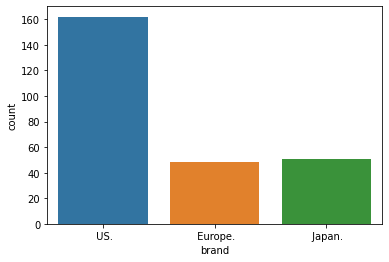

In [ ]:
# Gráfico mostra os valores únicos da classe para a coluna brand
sns.countplot(df['brand'])

Como mostra o gráfico acima ele é bem desbalanceado, sendo os carros como maior número desenvolvidos em US.

## Questionário

#### Pergunta 1
Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:

- Os valores nulos estão presentes apenas para a saída dos dados.

- Existem apenas duas características do tipo “string”.

- ***Não foram encontrados valores nulos após a leitura dos dados.***

- Os valores nulos encontrados estão presentes apenas no variável “cubicinches”.

#### Pergunta 2
Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro errors='coerce'. Após essa transformação é CORRETO afirmar:

- Após essa transformação não ocorreu a introdução de valores nulos.

- Após a transformação não ocorre mudanças no tipo de variáveis.

- ***Essa transformação adiciona valores nulos ao nosso dataset.***

- Essa transformação deve ser realizada apenas para valores nulos.

In [ ]:
cols = ['cubicinches', 'weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df[cols].isnull().sum()

cubicinches    2
weightlbs      3
dtype: int64

#### Pergunta 3
Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

- ***40 e 180.***

- 114 e 180.

- 38 e 120.

- 33 e 172.


In [ ]:
col = ['cubicinches']
df[col] = df[col].apply(pd.to_numeric, errors='coerce', axis=1)
df1 = df[col]
df1[df1.cubicinches.isnull()]

,cubicinches
40,NaN
180,NaN


#### Pergunta 4
Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

- 6.

- 2.

- ***5.***

- 3.

#### Pergunta 5
Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

- 1370,82.

- 1367,13.

- ***3009,83.***

- 3212,48.

In [ ]:
cols = ['weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df4 = df[cols]
print(f'mean com nulos: {df4.mean()}')
df4.fillna(df4.mean(), inplace=True)
print(f'Ainda exitem nulos: {df4.isnull().sum()}')
print(f'mean: {df4.mean()}')

mean com nulos: weightlbs    3009.833333
dtype: float64
Ainda exitem nulos: weightlbs    0
dtype: int64
mean: weightlbs    3009.833333
dtype: float64


#### Pergunta 6
Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

- ***22,0.***

- 26,3.

- 14,8.

- 31,4.

In [ ]:
cols = ['cubicinches', 'weightlbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df6 = df[cols]
df6.fillna(df6.mean(), inplace=True)
df6.isnull().sum()

cubicinches    0
weightlbs      0
dtype: int64

In [ ]:
df6.head()

,cubicinches,weightlbs
0,350.0,4209.0
1,89.0,1925.0
2,302.0,3449.0
3,400.0,3761.0
4,98.0,2051.0


In [ ]:
cols_two = ['mpg', 'cylinders','hp', 'time-to-60', 'year']
df7 = df[cols_two]
df7.head()

,mpg,cylinders,hp,time-to-60,year
0,14.0,8,165,12,1972
1,31.9,4,71,14,1980
2,17.0,8,140,11,1971
3,15.0,8,150,10,1971
4,30.5,4,63,17,1978


In [ ]:
# Junta as colunas adicionadas as médias com as outras
cars_df = pd.concat([df6, df7], axis=1)
cars_df.head()

,cubicinches,weightlbs,mpg,cylinders,hp,time-to-60,year
0,350.0,4209.0,14.0,8,165,12,1972
1,89.0,1925.0,31.9,4,71,14,1980
2,302.0,3449.0,17.0,8,140,11,1971
3,400.0,3761.0,15.0,8,150,10,1971
4,98.0,2051.0,30.5,4,63,17,1978


In [ ]:
cars_df.describe()

,cubicinches,weightlbs,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,200.918919,3009.833333,23.144828,5.590038,106.360153,15.547893,1976.819923
std,108.837269,849.097575,7.823570,1.733310,40.499959,2.910625,3.637696
min,68.000000,1613.000000,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,101.000000,2254.000000,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,156.000000,2904.000000,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,302.000000,3664.000000,28.800000,8.000000,138.000000,17.000000,1980.000000
max,455.000000,4997.000000,46.600000,8.000000,230.000000,25.000000,1983.000000


#### Pergunta 7
Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

- 25% dos valores de “time-to-60” são superiores ou iguais a 14,00.

- Apenas por esse valor é possível afirmar que existe uma menor dispersão entre valores inferiores a 14,00.

- ***75% dos dados são maiores que o valor de 14,00.***

- Como esse valor representa a mediana para essa variável, é possível dizer que 50% dos valores são superiores a 14,00.

In [ ]:
time_to = cars_df['time-to-60']
time_to.describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

#### Pergunta 8
Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

- Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” reduz em uma direção oposta.

- Quando um coeficiente de correlação de Pearson é igual a 1, o coeficiente de determinação também será igual a 1.

- Caso fosse calculado o coeficiente de determinação entre essas duas variáveis, o valor seria, aproximadamente, 0,6.

- ***Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” também aumenta em uma mesma direção.***

In [ ]:
correlation = cars_df[['cylinders', 'mpg']].corr(method='pearson')
correlation

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


#### Pergunta 9
Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

- ***Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.***

- Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”.

- Através do boxplot é possível perceber que a mediana encontra-se entre os valores de 80 e 100.

- Não foi identificada a presença de possíveis outliers nos dados.

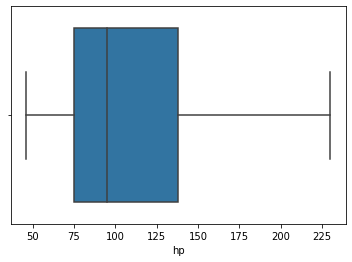

In [ ]:
ax = sns.boxplot(x=cars_df["hp"])
ax

#### Pergunta 10
Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

- 1,23

- ***1,45***

- 1,01

- 1,18

In [ ]:
normaliza = StandardScaler()
scaled = normaliza.fit_transform(cars_df)
scaled = np.array(scaled)
scaled

array([[ 1.37239295,  1.41499703, -1.17112732, ...,  1.45068065,
        -1.22128734, -1.32753906],
       [-1.03028992, -1.28008557,  1.12122635, ..., -0.87476849,
        -0.53282946,  0.8758803 ],
       [ 0.93052024,  0.51820947, -0.78693397, ...,  0.83221013,
        -1.56551627, -1.60296648],
       ...,
       [ 0.28612253, -0.20630047, -0.14661172, ...,  0.13952316,
        -0.18860053,  1.70216257],
       [ 0.28612253,  0.32823211, -0.65886952, ..., -0.15734269,
         0.15562841, -1.32753906],
       [ 0.4518248 ,  0.40493105, -0.14661172, ..., -0.03364859,
        -0.18860053,  0.04959804]])

In [ ]:
df10 = pd.DataFrame(scaled, columns=cars_df.columns)
df10 = df10.stack()
df10 

0    cubicinches    1.372393
     weightlbs      1.414997
     mpg           -1.171127
     cylinders      1.393053
     hp             1.450681
                      ...   
260  mpg           -0.146612
     cylinders      0.236974
     hp            -0.033649
     time-to-60    -0.188601
     year           0.049598
Length: 1827, dtype: float64

In [ ]:
df10.sort_values(ascending=False)
df10.head()

0  cubicinches    1.372393
   weightlbs      1.414997
   mpg           -1.171127
   cylinders      1.393053
   hp             1.450681
dtype: float64

#### Pergunta 11
Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?

- 92%

- 34%

- 13%

- ***72%***

In [ ]:
pca = PCA(n_components=7)

In [ ]:
pca.fit(scaled)
print(pca.explained_variance_ratio_)

[0.72371349 0.12675138 0.09126131 0.02773591 0.01766794 0.00798425
 0.00488572]


In [ ]:
df_pca = pca.transform(scaled)
df_pca

array([[ 3.48521925,  0.5263255 , -0.13973834, ...,  0.08690179,
        -0.17920558,  0.07907785],
       [-2.17691231, -0.28542399, -1.3046126 , ..., -0.28969849,
        -0.04114712, -0.01312739],
       [ 2.6849731 ,  1.04694609, -0.73215552, ..., -0.53516815,
        -0.07574501,  0.15995575],
       ...,
       [-0.05384928, -1.58270559, -0.2851369 , ..., -0.30790924,
         0.49848823, -0.15274899],
       [ 0.78538633,  1.18244612,  0.60971526, ..., -0.20311094,
        -0.21777245, -0.1097028 ],
       [ 0.54934121, -0.22344808,  0.0834219 , ..., -0.1413986 ,
        -0.23267174, -0.22236514]])

#### Pergunta 12
Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:

- Existem 3 centroides após a aplicação da clusterização.

- Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões.

- Cada um dos clusters possui características próprias.

- ***Todos os clusters possuem a mesma quantidade de elementos.***

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[-2.21903474e-01  3.35880334e-01  2.83961966e-01 -2.67686215e-01
  -5.45225710e-02 -4.15058549e-03  6.49104031e-03]
 [-2.21966813e+00 -1.65114484e-01 -1.97903173e-01  1.41526756e-01
   5.21847434e-02 -6.14922939e-03 -2.61748230e-02]
 [ 3.08082252e+00 -1.98389792e-01 -9.38631667e-02  1.45525382e-01
   5.33778892e-05  1.28250676e-02  2.52789802e-02]]


In [ ]:
kmeans.labels_

array([2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0],
      dtype=int32)

In [ ]:
df['kmeans'] = kmeans.labels_
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,kmeans
0,14.0,8,350.0,165,4209.0,12,1972,US.,2
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,2
3,15.0,8,400.0,150,3761.0,10,1971,US.,2
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


In [ ]:
df['kmeans'].value_counts()

1    95
0    91
2    75
Name: kmeans, dtype: int64

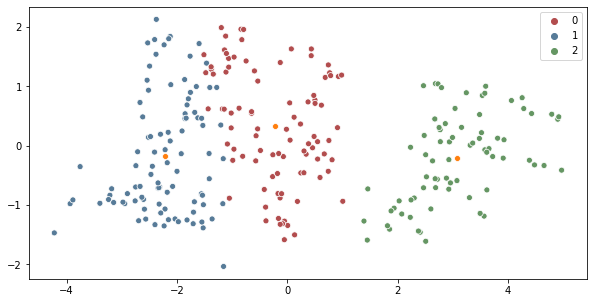

In [ ]:
plt.figure(figsize=(10, 5))
x, y = zip(*df_pca[:,:2])
x_, y_ = zip(*kmeans.cluster_centers_[:,:2])
sns.scatterplot(x, y, kmeans.labels_, palette=sns.color_palette("Set1", n_colors=3, desat=.5))
sns.scatterplot(x_, y_, markers=['x']);

#### Pergunta 13
Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

- Aproximadamente, 0,99.

- Aproximadamente, 0,63.

- Aproximadamente, 0,70.

- ***Aproximadamente, 0,87.***

In [ ]:
X = df_pca
y = kmeans.labels_

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape[0] == y_train.shape[0]

True

In [ ]:
# Training on the existing dataset
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Evaluating the model
y_pred_dtc = clf_dtc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        37
           2       1.00      1.00      1.00        19

    accuracy                           0.97        79
   macro avg       0.98      0.98      0.98        79
weighted avg       0.97      0.97      0.97        79



#### Pergunta 14
Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

- Os falso-positivos correspondem a instâncias em que o algoritmo considerou a previsão como verdadeira e, na realidade, ela era falsa.

- ***Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.***

- A matriz de confusão se constitui em uma estratégia ainda mais importante quando um dataset não está balanceado.

- A diagonal principal da matriz mostra que as instâncias em que as previsões foram corretas.

In [ ]:
# Training on the existing dataset
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Evaluating the model
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        19

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



In [ ]:
print(confusion_matrix(y_test, y_pred_lr))

[[23  0  0]
 [ 0 37  0]
 [ 0  0 19]]


#### Pergunta 15
Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar:

- Como os dois modelos obtiveram um resultado superior a 80% de acurácia, a escolha sobre qual utilizar deve e pode ser feita a partir de outros critérios, como a complexidade do modelo.

- A árvore de decisão e a regressão logística podem ser utilizadas para previsão em regressões.

- ***A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.***

- A acurácia de ambos os modelos foi superior a 80%.